In [120]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [297]:
df = pd.read_excel('/Users/harikesh/Desktop/ClassicalMachineLearning-ISL/Datasets/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [298]:
df["AT"] = df["AT"] + 273.15 #temperature to kelvin 
df2 = df[df['RH'] <= 100]
df2.head()

,AT,V,AP,RH,PE
0,288.11,41.76,1024.07,73.17,463.26
1,298.33,62.96,1020.04,59.08,444.37
2,278.26,39.40,1012.16,92.14,488.56
3,294.01,57.32,1010.24,76.64,446.48
4,283.97,37.50,1009.23,96.62,473.90


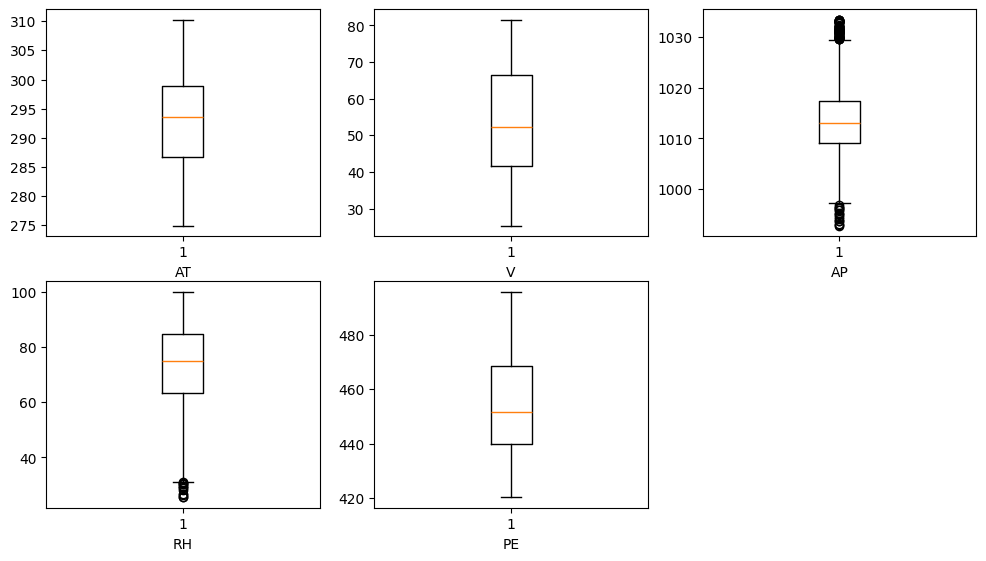

In [299]:
plt.figure(figsize=(12,10))
for idx,features in enumerate(df2.columns):
    plt.subplot(3,3,idx+1)
    plt.xlabel(features)
    plt.boxplot(df2[features])

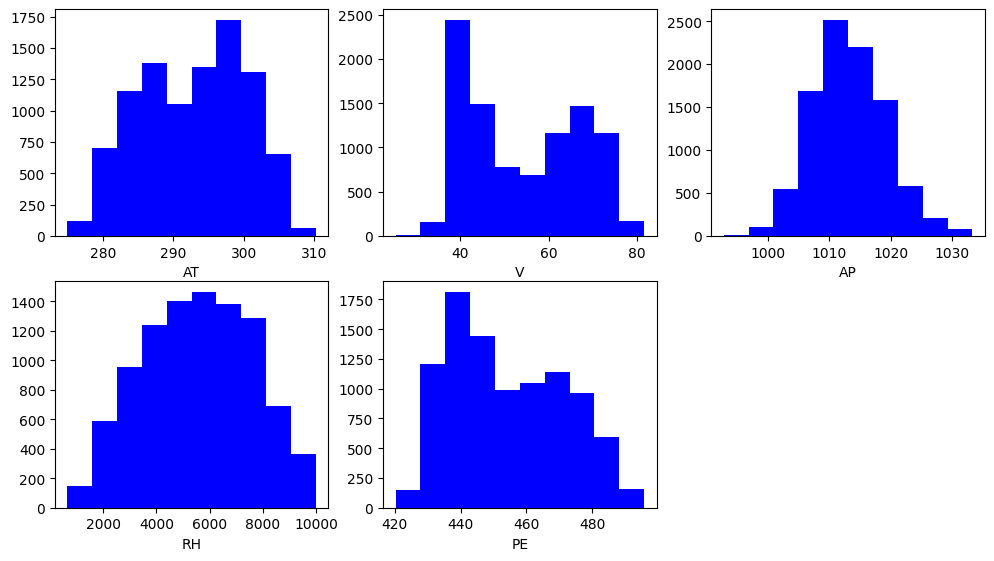

In [304]:
plt.figure(figsize=(12,10))
for idx,features in enumerate(df2.columns):
    plt.subplot(3,3,idx+1)
    plt.xlabel(features)
    # plt.hist(np.log(df2[features]),color='red')
    plt.hist(df2[features],color='blue')

<Axes: >

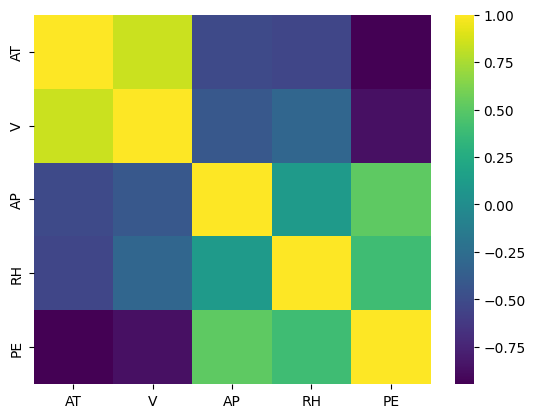

In [248]:
sns.heatmap(df2.corr(),cmap='viridis')

## Correlation Analysis 
- total energy is highly correlated with *Vacuum* and *Ambient Temperature*


In [303]:
df2['RH'] = df2['RH']**2

/var/folders/f6/nmq5h9nx4pg4d5qvp725r4900000gn/T/ipykernel_51427/786525916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RH'] = df2['RH']**2


In [305]:
x_train,x_test,y_train,y_test = train_test_split(df2.drop(columns=['PE']),df2['PE'],shuffle=True,test_size=0.10,random_state=42)

In [306]:
#Iqr filtering for the train_data
combines = pd.concat([x_train,y_train],axis=1)
for features in combines.columns:
    if features != 'PE':
        iqr = combines[features].quantile(0.75) - combines[features].quantile(0.25)
        lower = combines[features].quantile(0.25) - 1.5*iqr
        upper = combines[features].quantile(0.75) + 1.5*iqr

        combines = combines[(combines[features] >= lower) & (combines[features] <= upper)]

x_train = combines.drop(columns=['PE'])
y_train = combines['PE']

In [307]:
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(X=x_train,y=y_train)

In [308]:
model1 = LinearRegression()
model2 = RidgeCV(alphas =np.linspace(0.1,20,20))
model3 = LassoCV(alphas=np.linspace(0.1,10,10))

In [309]:
model1.fit(x_train_transformed,y_train)
model2.fit(x_train_transformed,y_train)
model3.fit(x_train_transformed,y_train)

LassoCV(alphas=array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]))

In [310]:
x_test_transformed = scaler.transform(X=x_test)

In [311]:
predictions1 = model1.predict(x_test_transformed)
predictions2 = model2.predict(x_test_transformed)
predictions3 = model3.predict(x_test_transformed)

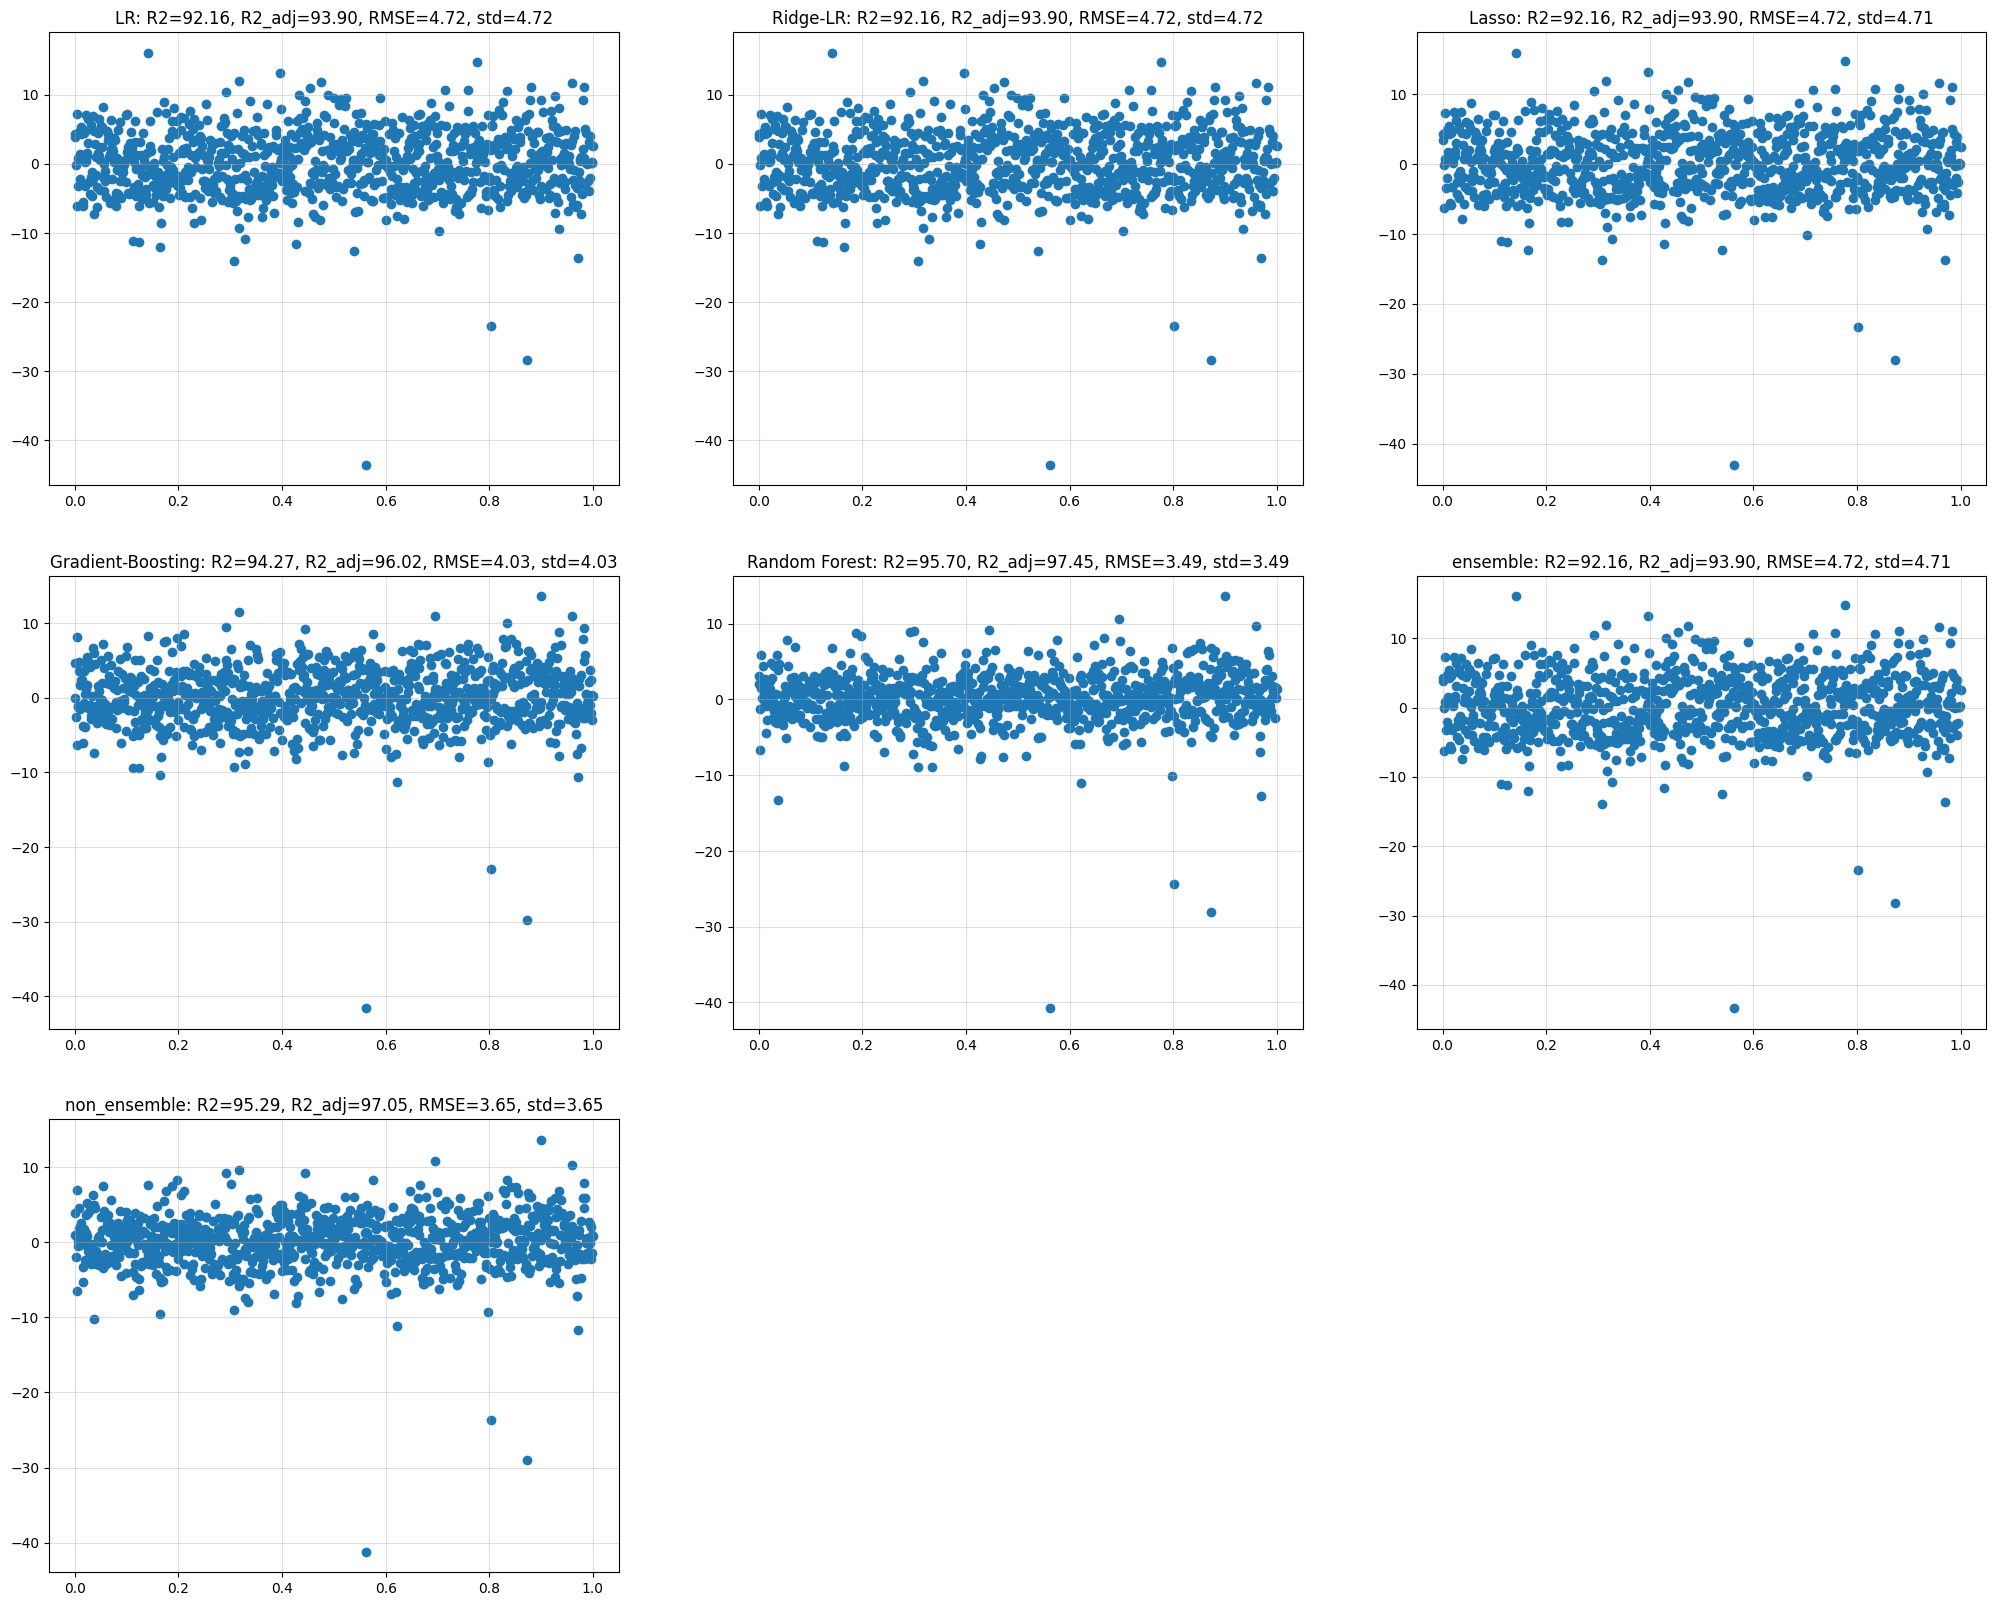

In [316]:
ensemble = (predictions1+predictions2+predictions3)/3
non_ensemble = (non_pred1+non_pred2)/2
predictions = [predictions1, predictions2,predictions3,non_pred1,non_pred2,ensemble,non_ensemble]
models = ['LR','Ridge-LR','Lasso','Gradient-Boosting','Random Forest','ensemble','non_ensemble']
ref = y_test
x = np.linspace(0,1,len(predictions1)).reshape(len(predictions1),)
plt.figure(figsize=(25,20))
# plt.title('Residual Plots')
for idx,preds in enumerate(predictions):
    #rs = 1- rss/tss
    rss = np.sum((ref-preds)**2)
    tss = np.sum((ref-ref.mean())**2)
    r2 = 1-rss/tss
    r2_adjusted = 1 - (rss/len(predictions1)-4-1)/(tss/len(predictions1)-1)
    rmse = np.sqrt(rss/len(predictions1)).item()
    plt.subplot(3,3,idx+1)
    plt.scatter(x,(ref-preds))
    # plt.boxplot((ref-preds))
    plt.title(f'{models[idx]}: R2={r2*100:.2f}, R2_adj={r2_adjusted*100:.2f}, RMSE={rmse:.2f}, std={(ref-preds).std():.2f}')
    # plt.axis('off')
    plt.grid(alpha=0.4)
# plt.tight_layout()

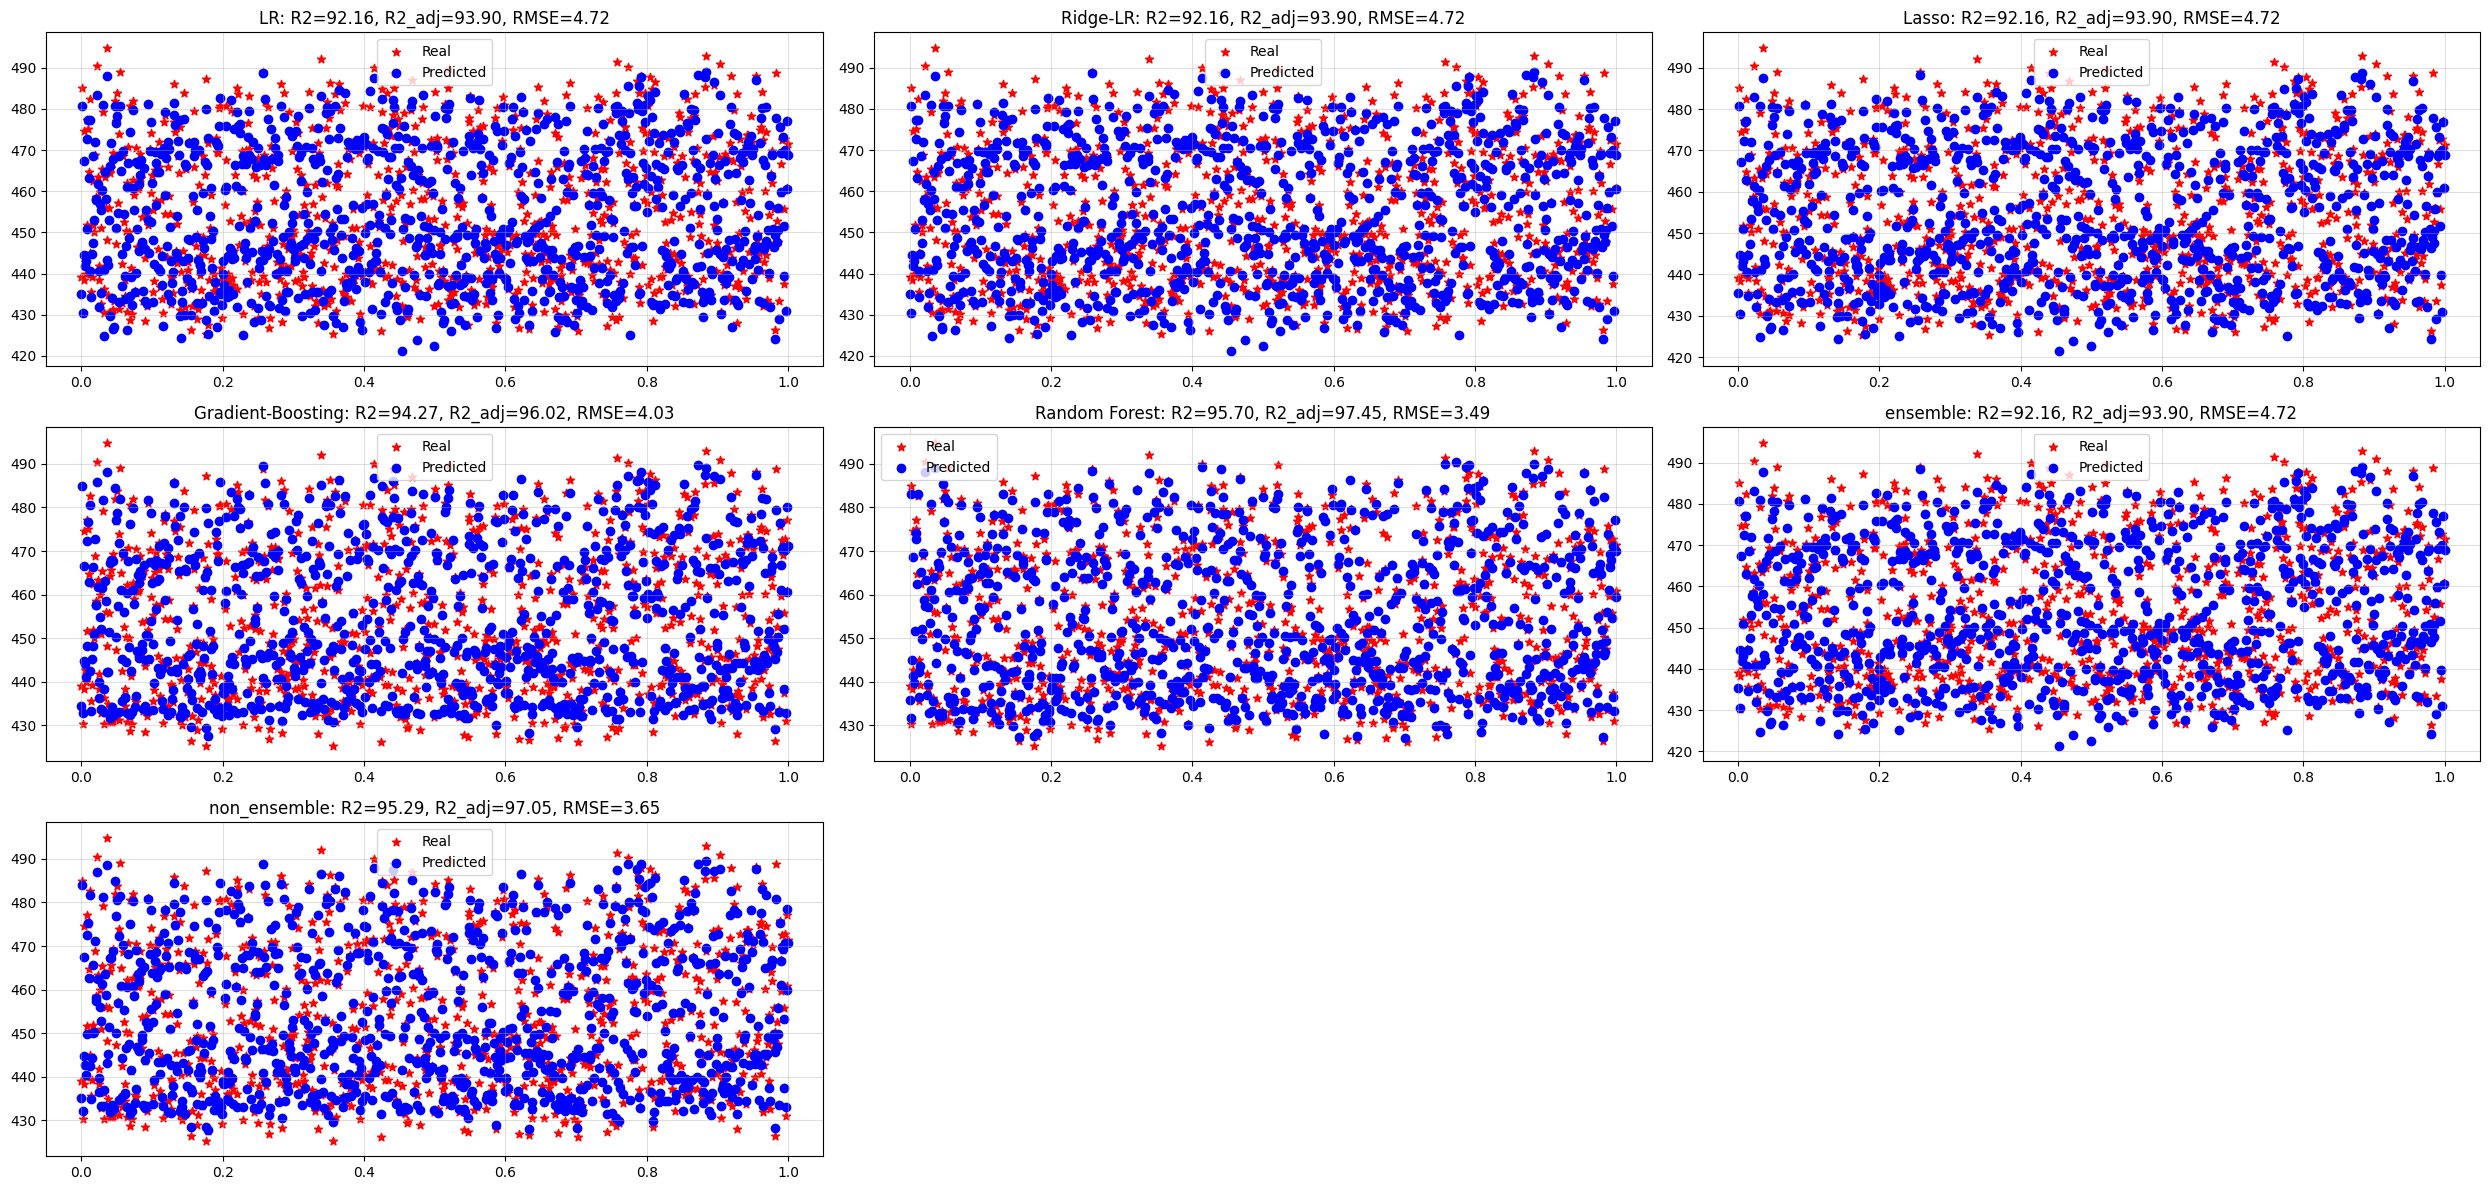

In [317]:
ensemble = (predictions1+predictions2+predictions3)/3
non_ensemble = (non_pred1+non_pred2)/2
predictions = [predictions1, predictions2,predictions3,non_pred1,non_pred2,ensemble,non_ensemble]
models = ['LR','Ridge-LR','Lasso','Gradient-Boosting','Random Forest','ensemble','non_ensemble']
ref = y_test
x = np.linspace(0,1,len(predictions1)).reshape(len(predictions1),)
plt.figure(figsize=(25,12))
# plt.title('Residual Plots')
for idx,preds in enumerate(predictions):
    #rs = 1- rss/tss
    rss = np.sum((ref-preds)**2)
    tss = np.sum((ref-ref.mean())**2)
    r2 = 1-rss/tss
    r2_adjusted = 1 - (rss/len(predictions1)-4-1)/(tss/len(predictions1)-1)
    rmse = np.sqrt(rss/len(predictions1)).item()
    plt.subplot(3,3,idx+1)
    plt.scatter(x,ref,color='red',label='Real',marker='*')
    plt.scatter(x,preds,color='blue',label='Predicted',marker='o')
    plt.title(f'{models[idx]}: R2={r2*100:.2f}, R2_adj={r2_adjusted*100:.2f}, RMSE={rmse:.2f}')
    # plt.axis('off')
    plt.legend()
    plt.grid(alpha=0.4)
plt.tight_layout()

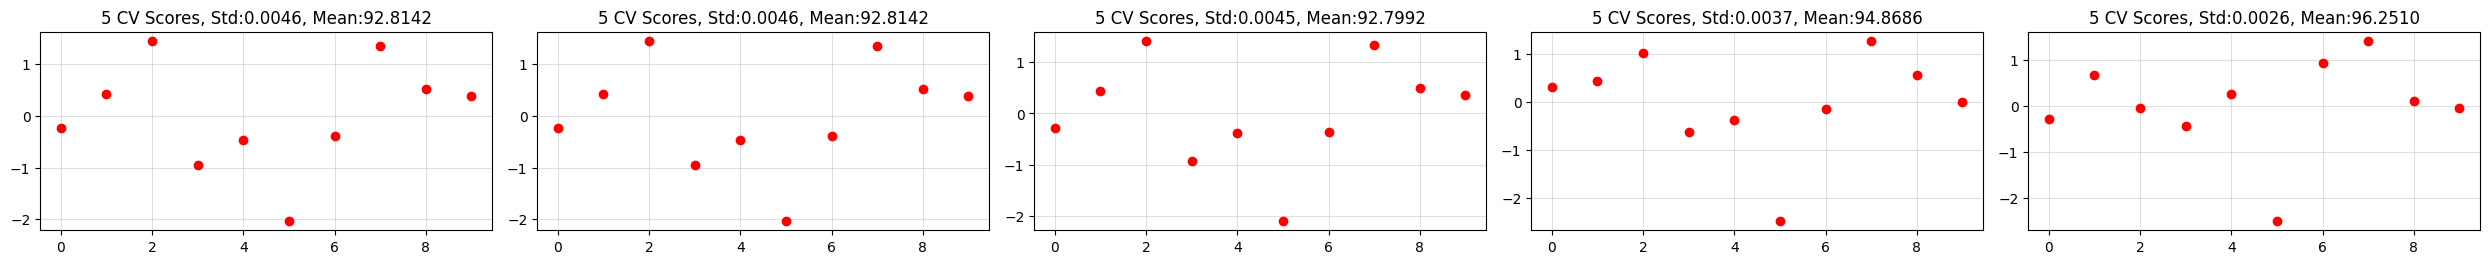

In [318]:
models = [model1,model2,model3,non_model1,non_model2]
plt.figure(figsize=(25,12))
for idx,model in enumerate(models):
    scores = cross_val_score(model,x_train_transformed,y_train,cv=10,scoring='r2')
    plt.subplot(len(models),len(models),idx+1)
    plt.plot((scores-scores.mean())/scores.std(),'ro')
    plt.title(f'5 CV Scores, Std:{scores.std():.4f}, Mean:{scores.mean()*100:.4f}')
    plt.grid(alpha=0.4) 
plt.tight_layout()


# Trying non linear regressors 

In [281]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 


In [312]:
non_model1 = GradientBoostingRegressor()
non_model2 = RandomForestRegressor()

In [313]:
non_model1.fit(x_train_transformed,y_train)
non_model2.fit(x_train_transformed,y_train)

RandomForestRegressor()

In [314]:
non_pred1 = non_model1.predict(x_test_transformed)
non_pred2 = non_model2.predict(x_test_transformed)